[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/trend_peyton_manning.ipynb)

# Fitting a changing trend

We will use the time series of the log daily page views for the Wikipedia page for Peyton Manning as an example to illustrate how to fit a changing trend.

First, we load the data:

In [1]:
if "google.colab" in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
df.head(3)

,ds,y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837


Now we can fit an initial model without any customizations.

We specify the data frequency to be daily. The model will remember this later when we predict into the future.

In [3]:
m = NeuralProphet(epochs=3, n_lags=4, n_forecasts=3)
metrics = m.fit(df, freq="D" )
metrics.head(3)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
WARNING - (py.warnings._showwarnmsg) - /Users/alfonsogarciadecorral/Desktop/code/neural_prophet/env/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:117: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

Loading `train_dataloader` to estimate number of stepping batches.
WARNING - (py.warnings._showwarnmsg) - /Users/alfonsogarciadecorral/Desktop/code/neural_prophet/env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:225: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(



Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=237` reached.
Restoring states from the checkpoint path at /Users/alfonsogarciadecorral/Desktop/code/neural_prophet/tutorials/feature-use/.lr_find_e30829f0-ad69-4d7d-9c6a-6f5a2d17e355.ckpt
Loading `train_dataloader` to estimate number of stepping batches.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ metrics_train │ MetricCollection │      0 │
│ 1 │ metrics_val   │ MetricCollection │      0 │
│ 2 │ season_params │ ParameterDict    │     18 │
│ 3 │ ar_net        │ ModuleList       │     12 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 43                                                                         
Non-trainable params: 0                                                                      
Total params: 43                                                                             
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=3` reached.


,MAE,RMSE,Loss,RegLoss,epoch
0,3.249812,3.981979,0.297142,0.0,0
1,0.578696,0.772170,0.011057,0.0,1
2,0.512439,0.689831,0.008996,0.0,2


The returned metrics dataframe contains recoded metrics for each training epoch.

Next, we create a dataframe to predict on.
Here, we specify that we want to predict one year into the future and that we want to include the entire history.

In [4]:
future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)
future.tail(3)

,ds,y
2964,2016-01-21,None
2965,2016-01-22,None
2966,2016-01-23,None


Note: 'y' and 'y_scaled' are not given for the period extending into the future, as we do not know their true values.

In [5]:
forecast = m.predict(future)
print(list(forecast.columns))

WARNING - (py.warnings._showwarnmsg) - /Users/alfonsogarciadecorral/Desktop/code/neural_prophet/env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:225: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(



Output()

['ds', 'y', 'residual1', 'yhat1', 'residual2', 'yhat2', 'residual3', 'yhat3', 'ar1', 'ar2', 'ar3', 'trend', 'season_yearly', 'season_weekly']


In [7]:

forecast

,ds,y,residual1,yhat1,residual2,yhat2,residual3,yhat3,ar1,ar2,ar3,trend,season_yearly,season_weekly
0,2007-12-10,9.5908,NaN,None,NaN,None,NaN,None,None,None,None,None,None,None
1,2007-12-11,8.5196,NaN,None,NaN,None,NaN,None,None,None,None,None,None,None
2,2007-12-12,8.1837,NaN,None,NaN,None,NaN,None,None,None,None,None,None,None
3,2007-12-13,8.0725,NaN,None,NaN,None,NaN,None,None,None,None,None,None,None
4,2007-12-14,7.8936,0.286716,8.180316,NaN,None,NaN,None,0.663203,None,None,7.56474,0.190792,-0.238419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2016-01-19,9.1259,1.002794,10.128694,-1.113215,8.012685,-0.763866,8.362034,2.738992,0.622983,0.972333,6.561602,0.607437,0.220663
2963,2016-01-20,8.8914,0.618419,9.509819,-0.709519,8.181881,0.434188,9.325588,2.502848,1.17491,2.318617,6.561042,0.608692,-0.162763
2964,2016-01-21,NaN,NaN,8.631869,NaN,9.215101,NaN,10.35597,1.681841,2.265074,3.405943,6.560483,0.607842,-0.218297
2965,2016-01-22,NaN,NaN,None,NaN,8.70208,NaN,10.408056,None,1.77573,3.481707,6.559923,0.604846,-0.238419


In [10]:
m.dataset_train_vis[-1]

(OrderedDict([('time', tensor([0.9993, 0.9997, 1.0000])),
              ('seasonalities',
               OrderedDict([('yearly',
                             tensor([[ 0.2800,  0.9600,  0.5377,  0.8432,  0.7523,  0.6588,  0.9067,  0.4218,
                                       0.9885,  0.1510,  0.9913, -0.1319],
                                     [ 0.2965,  0.9550,  0.5664,  0.8242,  0.7853,  0.6192,  0.9335,  0.3585,
                                       0.9979,  0.0655,  0.9724, -0.2333],
                                     [ 0.3129,  0.9498,  0.5944,  0.8042,  0.8162,  0.5778,  0.9560,  0.2934,
                                       0.9998, -0.0204,  0.9432, -0.3322]])),
                            ('weekly',
                             tensor([[-0.4339, -0.9010,  0.7818,  0.6235, -0.9749, -0.2225],
                                     [-0.9749, -0.2225,  0.4339, -0.9010,  0.7818,  0.6235],
                                     [-0.7818,  0.6235, -0.9749, -0.2225, -0.4339, -0.90

In [14]:
m.config_trend

Trend(growth='linear', changepoints=array([0.        , 0.07272727, 0.14545455, 0.21818182, 0.29090909,
       0.36363636, 0.43636364, 0.50909091, 0.58181818, 0.65454545,
       0.72727273]), n_changepoints=10, changepoints_range=0.8, trend_reg=0, trend_reg_threshold=None, trend_global_local='global')

In [13]:
m.dataset_pred_vis[-1]

(OrderedDict([('time', tensor([1.0003, 1.0007, 1.0010])),
              ('seasonalities',
               OrderedDict([('yearly',
                             tensor([[ 0.3292,  0.9443,  0.6217,  0.7833,  0.8449,  0.5350,  0.9739,  0.2270,
                                       0.9943, -0.1062,  0.9039, -0.4276],
                                     [ 0.3454,  0.9385,  0.6483,  0.7614,  0.8714,  0.4907,  0.9872,  0.1595,
                                       0.9815, -0.1913,  0.8551, -0.5185],
                                     [ 0.3615,  0.9324,  0.6741,  0.7387,  0.8955,  0.4451,  0.9958,  0.0913,
                                       0.9615, -0.2749,  0.7971, -0.6038]])),
                            ('weekly',
                             tensor([[-6.5251e-13,  1.0000e+00, -1.3050e-12,  1.0000e+00, -1.3855e-13,
                                       1.0000e+00],
                                     [ 7.8183e-01,  6.2349e-01,  9.7493e-01, -2.2252e-01,  4.3388e-01,
                

In [31]:
m.dataset_vis[-1]

(OrderedDict([('time', tensor([1.0003, 1.0007, 1.0010])),
              ('seasonalities',
               OrderedDict([('yearly',
                             tensor([[ 0.3292,  0.9443,  0.6217,  0.7833,  0.8449,  0.5350,  0.9739,  0.2270,
                                       0.9943, -0.1062,  0.9039, -0.4276],
                                     [ 0.3454,  0.9385,  0.6483,  0.7614,  0.8714,  0.4907,  0.9872,  0.1595,
                                       0.9815, -0.1913,  0.8551, -0.5185],
                                     [ 0.3615,  0.9324,  0.6741,  0.7387,  0.8955,  0.4451,  0.9958,  0.0913,
                                       0.9615, -0.2749,  0.7971, -0.6038]])),
                            ('weekly',
                             tensor([[-6.5251e-13,  1.0000e+00, -1.3050e-12,  1.0000e+00, -1.3855e-13,
                                       1.0000e+00],
                                     [ 7.8183e-01,  6.2349e-01,  9.7493e-01, -2.2252e-01,  4.3388e-01,
                

The returned forecast dataframe contains the original datestamps, 'y' values, the predicted 'yhat' values, residuals and all the individual model components.

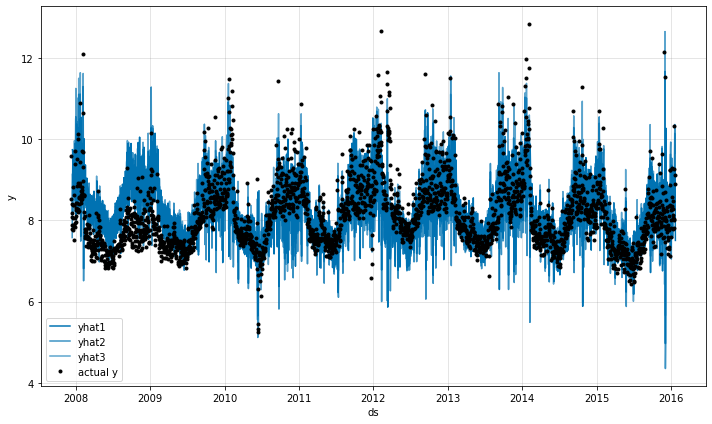

In [29]:
# plots the model predictions
fig1 = m.plot(forecast)

In [286]:
np.random.rand(9) - 0.5

array([ 0.06763119, -0.31147962, -0.05508632,  0.38975901, -0.17553969,
        0.24526914, -0.45234013,  0.24312404,  0.0337211 ])

In [50]:
import numpy as np
import matplotlib.pyplot as plt
slope_deltas = np.array([2,2,3,5,6,3,2,1,-1])
# slope_deltas = -0.5+np.random.rand(9)
    
slope = np.trapz(slope_deltas)
distance_all = 10
distance_last = 20
time_series_slopes_history = np.concatenate([np.repeat(slope_deltas, distance_all) , np.repeat(slope_deltas[-1], distance_last - distance_all)], axis=0)

time_series_history = []
for i, sl_d in enumerate(time_series_slopes_history):
    if i == 0:
        time_series_history.append(0)
    else:
        time_series_history.append(sl_d + time_series_history[i-1])
time_series_history = np.array(time_series_history)



In [56]:
from time import time

In [52]:
n_forecasts = 100
stabilising_ratio = 1 # [0,1]
fading_factor = 0.4 # [0,1]
k_d = 1
k_p = 1

def slope_finder(stabilising_ratio, time_series_history, fading_factor, n_forecast):
    hist_size = len(time_series_history)
    time_frame_covered = (min(1, n_forecast / hist_size) ** fading_factor) * (1 / stabilising_ratio)
    print(time_frame_covered)
    return np.mean(time_series_slopes_history[-int(len(time_series_slopes_history) * time_frame_covered + 1) -1 :-1])

time_series_forecast = []
time_series_forecast_2 = []
time_series_forecast_3 = []
decay = 0.001

slope_array = []
for i in range(n_forecasts):
    time_series_forecast_i = time_series_history[-1] + (i+1) * slope_finder(stabilising_ratio, time_series_history,fading_factor, i+1)
    time_series_forecast.append(time_series_forecast_i)
    if i == 0:
        time_series_forecast_2_i = (time_series_history[-1] + slope_finder(stabilising_ratio, time_series_history,fading_factor, i+1))
    else:
        time_series_forecast_2_i = (time_series_forecast_2[i-1] + slope_finder(stabilising_ratio, time_series_history,fading_factor, i+1))
    time_series_forecast_2.append(time_series_forecast_2_i)
    
    
    time_series_forecast_3.append(time_series_forecast_i + (2.71**(-decay*i))*((time_series_forecast_2_i - time_series_forecast_i))  )

    slope_array.append(slope_finder(stabilising_ratio, time_series_history,fading_factor, i+1))
time_series_forecast = np.array(time_series_forecast)
time_series_forecast_2 = np.array(time_series_forecast_2)
time_series_forecast_3 = np.array(time_series_forecast_3)

slope_array = np.array(slope_array)


0.15848931924611134
0.15848931924611134
0.15848931924611134
0.20912791051825463
0.20912791051825463
0.20912791051825463
0.2459509485849363
0.2459509485849363
0.2459509485849363
0.27594593229224296
0.27594593229224296
0.27594593229224296
0.30170881682725814
0.30170881682725814
0.30170881682725814
0.32453422231992085
0.32453422231992085
0.32453422231992085
0.3451749065980082
0.3451749065980082
0.3451749065980082
0.36411284060521604
0.36411284060521604
0.36411284060521604
0.3816778909618176
0.3816778909618176
0.3816778909618176
0.39810717055349726
0.39810717055349726
0.39810717055349726
0.41357766227900516
0.41357766227900516
0.41357766227900516
0.4282254736676647
0.4282254736676647
0.4282254736676647
0.44215785112818556
0.44215785112818556
0.44215785112818556
0.4554610198563667
0.4554610198563667
0.4554610198563667
0.4682054920046205
0.4682054920046205
0.4682054920046205
0.48044977359257246
0.48044977359257246
0.48044977359257246
0.4922430222531833
0.4922430222531833
0.4922430222531833
0

In [53]:
slope_finder(stabilising_ratio, time_series_history, fading_factor, 10)

0.39810717055349726


0.35

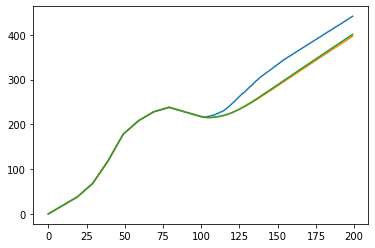

In [54]:
plt.plot( np.concatenate([time_series_history, time_series_forecast], axis=0))

plt.plot( np.concatenate([time_series_history, time_series_forecast_2], axis=0))
plt.plot( np.concatenate([time_series_history, time_series_forecast_3], axis=0))


In [55]:
slope_finder(stabilising_ratio, time_series_history, 9)

TypeError: slope_finder() missing 1 required positional argument: 'n_forecast'

In [42]:
int(n_forecast *stabilising_ratio) + 1

NameError: name 'n_forecast' is not defined

In [7]:
# plots the individual forecast components for the given time period.
# fig = m.plot_components(forecast, residuals=True)

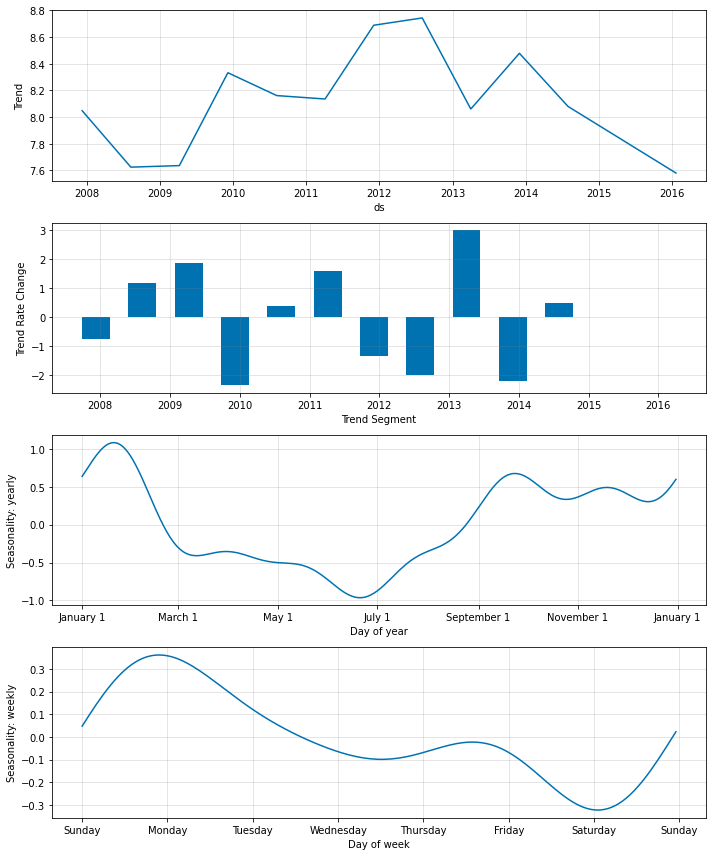

In [8]:
# visualizes the model parameters.
fig2 = m.plot_parameters()

## Adjusting Trend

The default values work fairly well in this example. However, the default of 5 changepoints may not be adequate if the actual change in trend happens to fall in a region between the points.

### Increasing Trend Flexibility
We can address this by increasing the number of changepoints, giving the trend more flexibility, at the danger of overfitting.

Let's try what happens if we increase the number of changepoints to 30.
Additionally, we can increase the range of data on which we fit trend changepoints to only exlude the last 10 percent (default is 20 percent).

Further, we can limit the trend flexibility by regularizing it.

In [ ]:
m = NeuralProphet(
    n_changepoints=30,
    changepoints_range=0.90,
    trend_reg=1,
)
metrics = m.fit(df, freq="D")
forecast = m.predict(df)

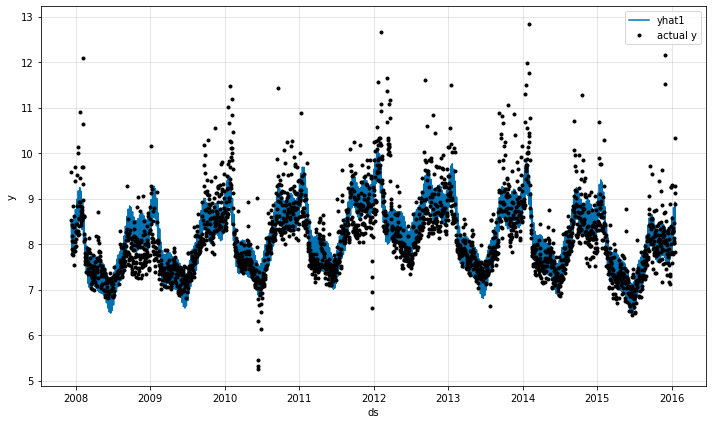

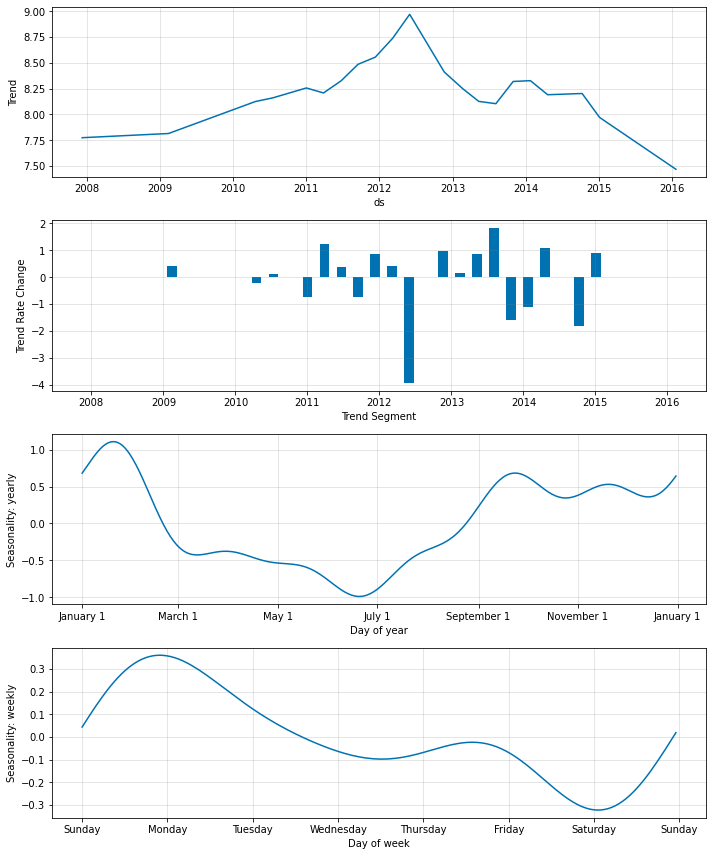

In [10]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()

Looking at the trend rate changes it becomes evident that the trend is overfitting to short-term fluctuations.

## Manual Trend Changepoints
You can also manually specify the trend changepoints.

Note: A changepoint will always be added at the beginning. You can ignore it.

In [11]:
m = NeuralProphet(
    changepoints=["2012-01-01", "2014-01-01"],
)
metrics = m.fit(df, freq="D")
forecast = m.predict(df)

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

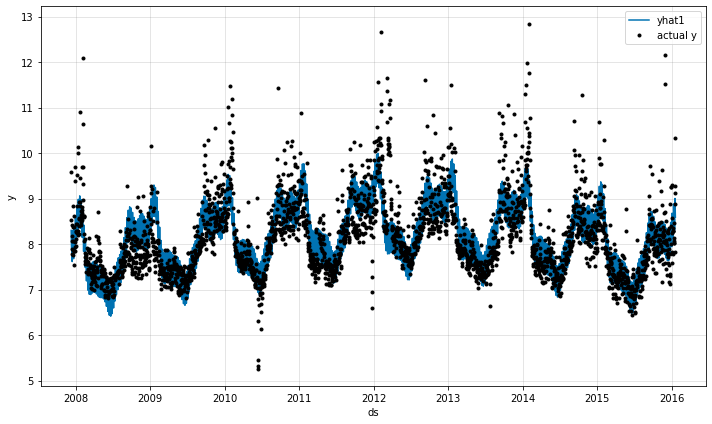

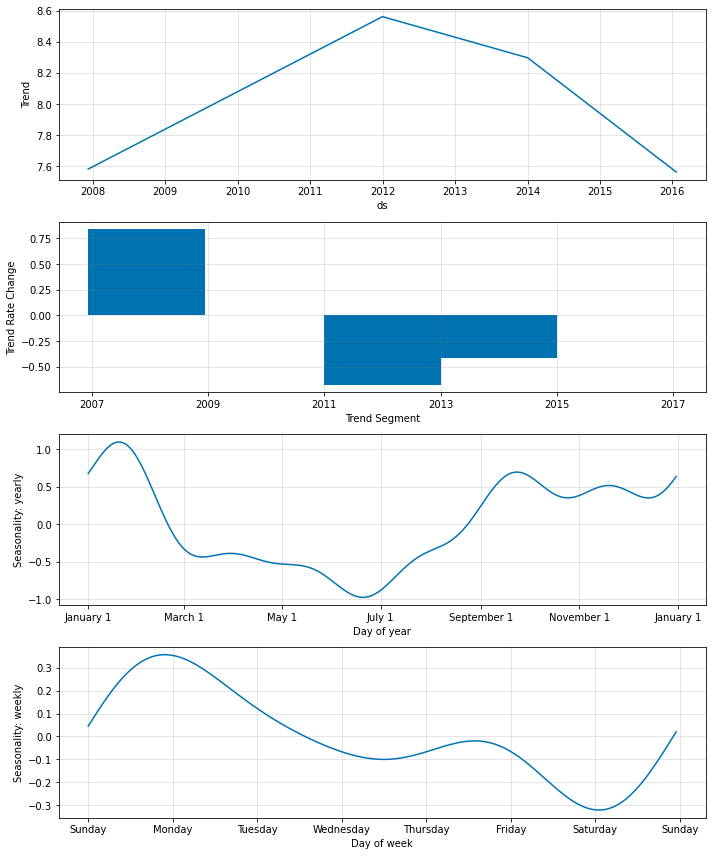

In [12]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()